In [37]:
import json
import pandas as pd
from matplotlib import pyplot as plt


In [11]:
from notebooks.trajectory.trajectory import TrajectoryTelemetry

telemetry = TrajectoryTelemetry()
subreq = telemetry.subscription()

with open("subscription.json", "w") as f:
    f.write(subreq.to_json())


In [12]:
df = pd.read_csv("data/tcr-0524-131529.csv")

<AxesSubplot:xlabel='drivesubsystem__odometry_x'>

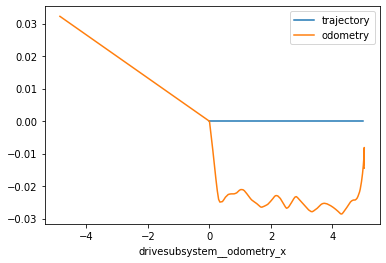

In [20]:
ax = df.plot(x="trajectory_command__traj__x", y="trajectory_command__traj__y", label="trajectory")
df.plot(x="drivesubsystem__odometry_x", y="drivesubsystem__odometry_y", label="odometry", ax=ax)

<AxesSubplot:xlabel='timestamp'>

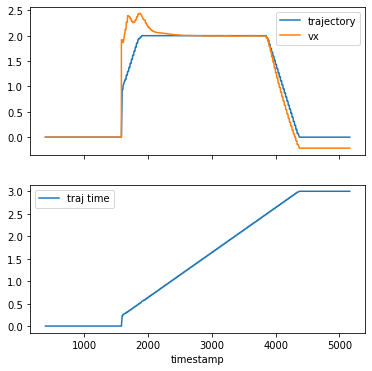

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
df.plot(x="timestamp", y="trajectory_command__traj__vel", label="trajectory", ax=ax1)
df.plot(
    x="timestamp",
    y="trajectory_command__hc_vx",
    label="vx",
    ax=ax1,
)
df.plot(x='timestamp', y='trajectory_command__traj__time', label='traj time', ax=ax2)


<AxesSubplot:xlabel='timestamp'>

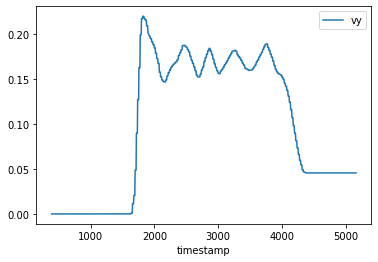

In [31]:
df.plot(
    x="timestamp",
    y="trajectory_command__hc_vy",
    label="vy",
)

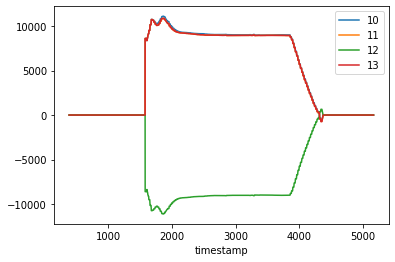

In [19]:
ax = df.plot(x="timestamp", y="talonfx_10__closed_loop_setpoint__pid_0_", label="10")
ax = df.plot(
    x="timestamp", y="talonfx_11__closed_loop_setpoint__pid_0_", label="11", ax=ax
)
ax = df.plot(
    x="timestamp", y="talonfx_12__closed_loop_setpoint__pid_0_", label="12", ax=ax
)
ax = df.plot(
    x="timestamp", y="talonfx_13__closed_loop_setpoint__pid_0_", label="13", ax=ax
)


<AxesSubplot:xlabel='timestamp'>

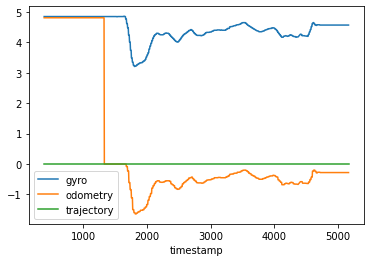

In [33]:
ax = df.plot(x='timestamp', y='drivesubsystem__gyro_rotation2d__deg_', label='gyro')
df.plot(x='timestamp', y='drivesubsystem__odometry_rotation2d__deg_', label='odometry', ax=ax)
df.plot(x='timestamp', y='trajectory_command__traj__degrees', label='trajectory', ax=ax)

<AxesSubplot:xlabel='timestamp'>

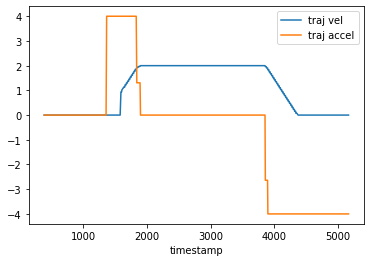

In [32]:
ax = df.plot(x='timestamp', y='trajectory_command__traj__vel', label='traj vel')
df.plot(x='timestamp', y='trajectory_command__traj__accel', label='traj accel', ax=ax)

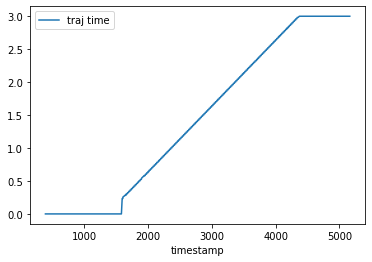

In [34]:
ax = df.plot(x='timestamp', y='trajectory_command__traj__time', label='traj time')

- timestamp
- trajectory_command__traj__x
- trajectory_command__traj__y
- trajectory_command__traj__vel
- trajectory_command__traj__accel
- trajectory_command__traj__degrees
- trajectory_command__traj__time
- trajectory_command__hc_vy
- trajectory_command__hc_vx
- trajectory_command__hc_omega
- drivesubsystem__odometry_x
- drivesubsystem__odometry_y
- drivesubsystem__gyro_rotation2d__deg_
- drivesubsystem__odometry_rotation2d__deg_
- talonfx_10__closed_loop_setpoint__pid_0_
- talonfx_11__closed_loop_setpoint__pid_0_
- talonfx_12__closed_loop_setpoint__pid_0_
- talonfx_13__closed_loop_setpoint__pid_0_

In [52]:
intervals = df['timestamp'] - df['timestamp'].shift()
intervals.describe()

count    969.000000
mean       4.926729
std        2.213734
min        0.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       36.000000
Name: timestamp, dtype: float64

<AxesSubplot:ylabel='Frequency'>

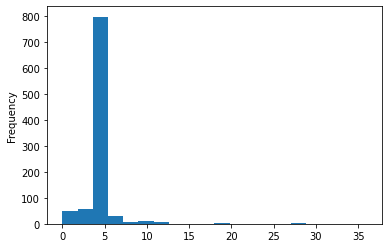

In [66]:
intervals.plot.hist(bins=20)